In [2]:
import geopandas as gpd

In [3]:
svi = gpd.read_file('../data/raw/Angola_SVI/Angola_SVI.shp')
svi

,NAME,SHPAREASQM,CODE_PROV,Area,SVI_final,geometry
0,Bengo,3.799123e+10,01,39037.725678,0.460,"MULTIPOLYGON (((13.12174 -7.83374, 13.12262 -7..."
1,Benguela,3.954707e+10,02,39540.644840,0.470,"MULTIPOLYGON (((12.53327 -13.49460, 12.53415 -..."
2,Bin,7.214479e+10,03,72128.989555,0.440,"POLYGON ((16.51842 -12.93037, 16.51646 -12.924..."
3,Cabinda,6.975749e+09,04,6975.018281,0.570,"POLYGON ((12.70953 -4.47119, 12.71201 -4.46971..."
4,Kuando Kubango,1.997968e+11,05,199628.976240,0.600,"POLYGON ((22.23500 -16.57628, 22.26069 -16.578..."
5,Kwanza Norte,2.029464e+10,06,19239.750483,0.440,"POLYGON ((14.54090 -9.78193, 14.53201 -9.77693..."
6,Kwanza Sul,5.539526e+10,07,55383.613611,0.450,"POLYGON ((15.26364 -9.80228, 15.27146 -9.80082..."
7,Kunene,7.735317e+10,08,77315.612786,0.400,"POLYGON ((16.29285 -17.39300, 15.38778 -17.390..."
8,Huambo,3.318300e+10,09,33179.234020,0.470,"POLYGON ((16.32458 -11.60925, 16.32562 -11.613..."
9,Huala,7.874020e+10,10,78718.638985,0.400,"POLYGON ((15.54323 -13.76351, 15.55979 -13.759..."


<Axes: >

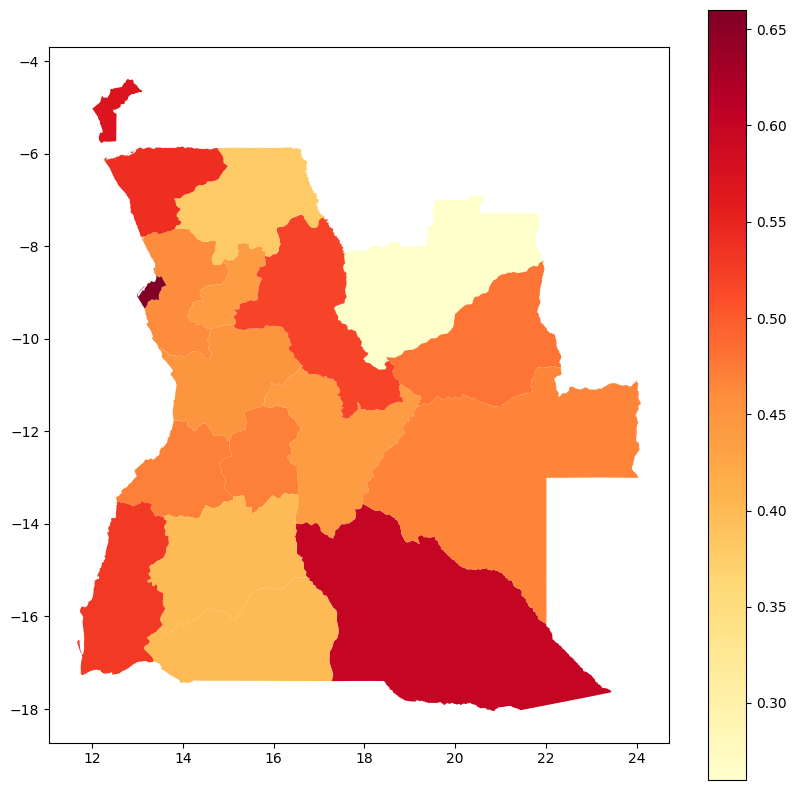

In [6]:
svi.plot(column='SVI_final', legend=True, cmap='YlOrRd', figsize=(10, 10))